In [44]:
# Data instantiation

# Daily mean maximum temp, Merced
# By month starting in January

temp = [55.6, 62, 68.1, 74, 82.7, 90.7, 96.3, 95.1, 90.5, 79.6, 66.1, 56]

# Mongthly average precipitation days
# By month starting in January
prec = [9.6, 9.5, 8.2, 4.9, 2.7, 0.6, 0.1, 0, 0.6, 3, 7.3, 9.7]

In [54]:
# We'll need to compute a lot of different
# parameters while we do linear regression:

# Expected value:
def E(X):
    return sum(X) / len(X)

# Covariance:
def Cov(X, Y):
    prod = [X[k] * Y[k] for k in range(len(X))]
    return E(prod) - E(X)*E(Y)

# Standard deviation
def sigma(X):
    return Cov(X, X)**.5

# Linear regression coefficients
def regress(X, Y):
    beta = Cov(X, Y) / (sigma(X)**2)
    alpha = E(Y) - beta*E(X)
    return [alpha, beta]

def R2(X, Y):
    alpha, beta = regress(X, Y)
    model = sum([(alpha + beta*X[i] - Y[i])**2 for i in range(len(Y))])
    var = sum([(y - E(Y))**2 for y in Y])
    return 1 - model / var
    
[alpha, beta] = regress(temp, prec)

R^2 value = 0.9715078670853299


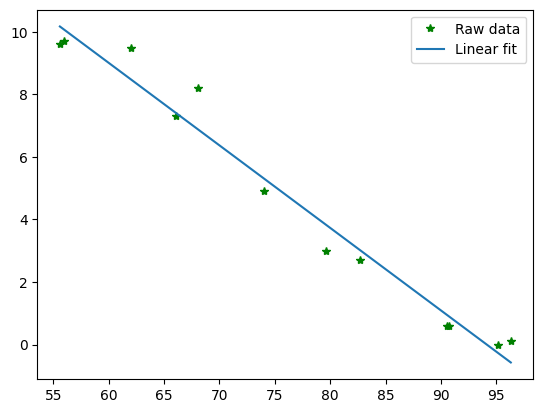

In [55]:
# Plot the data along with the regression line
import matplotlib.pyplot as plt

# Raw data
plt.plot(temp, prec, 'g*', 
         label='Raw data')

# Linear model
x1 = min(temp)
x2 = max(temp)
y1 = alpha + beta*x1
y2 = alpha + beta*x2
plt.plot([x1, x2], [y1, y2], '-', 
         label='Linear fit')

# Report the R^2 coefficient on the plot
print(f'R^2 value = {R2(temp, prec)}')
plt.legend()

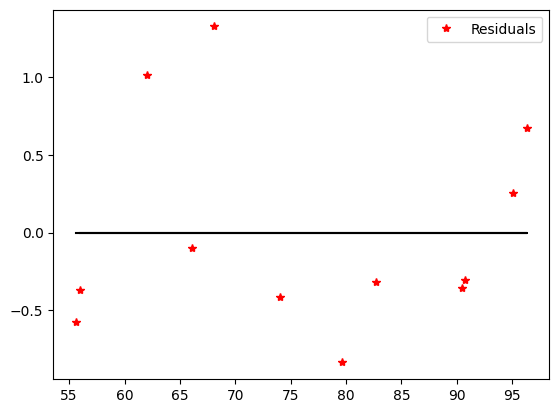

In [47]:
# Let's also plot the residuals
def residuals(X, Y):
    [alpha, beta] = regress(X, Y)
    return [Y[k] - alpha - beta*X[k] for k in range(len(X))]

resid = residuals(temp, prec)
plt.plot(temp, erlsid, 'r*', label='Residuals')
plt.plot(temp, [0]*len(temp), 'k-')
plt.legend()

R^2 value = 0.01313868613138669


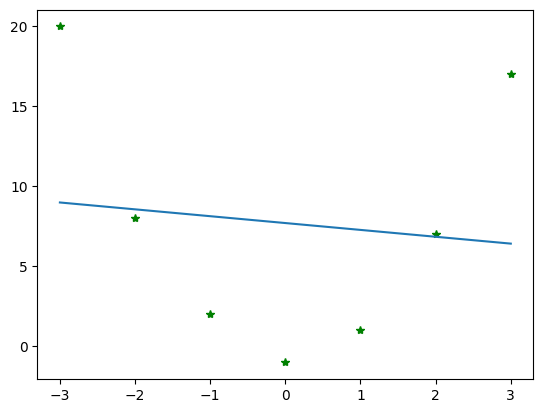

In [56]:
# Coefficient of determination
# This 

X = [-3, -2, -1, 0, 1, 2, 3]
Y = [20, 8, 2, -1, 1, 7, 17]

[alpha, beta] = regress(X, Y)
plt.plot(X, Y, 'g*')

x1 = min(X)
x2 = max(X)
y1 = alpha + beta*x1
y2 = alpha + beta*x2

plt.plot([x1, x2], [y1, y2], '-')
print(f'R^2 value = {R2(X, Y)}')